In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Performing EDA on the data
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

<Axes: >

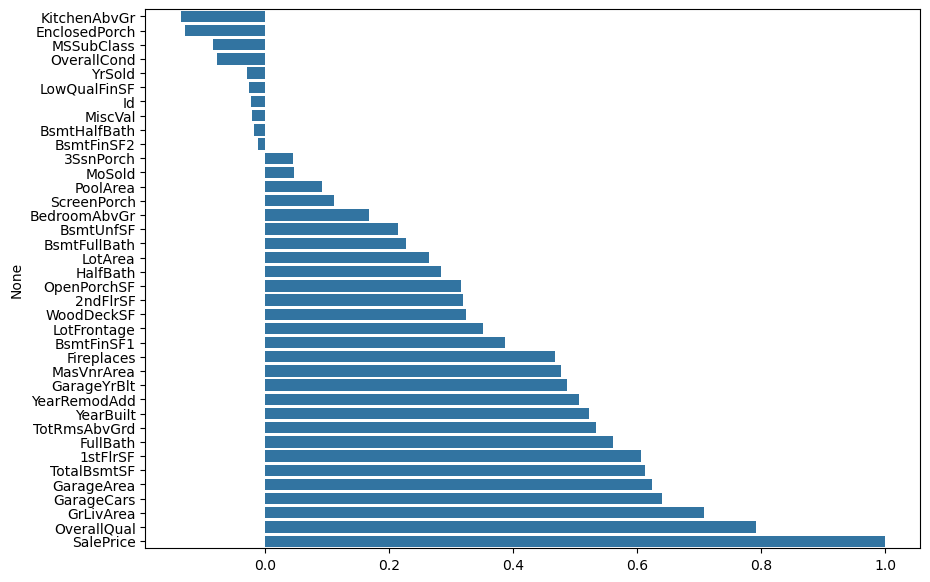

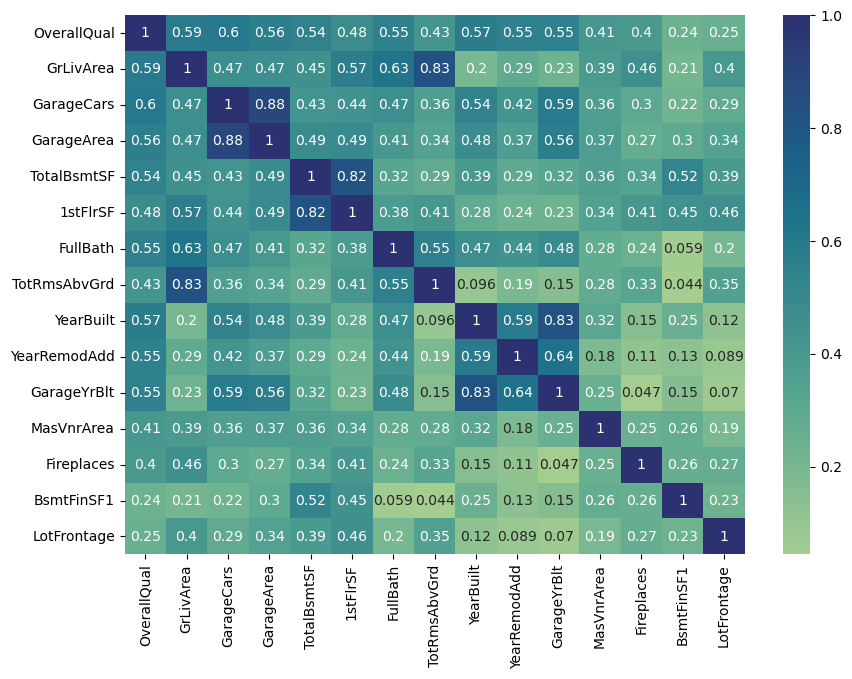

In [4]:
#Plotting co-realtions of columns with the target salesprice 
import matplotlib.pyplot as plt
import seaborn as sns
features = df.corr(numeric_only=True)['SalePrice'].sort_values()
plt.figure(figsize=(10, 7))
sns.barplot(y = features.index, x=features.values)

#Selecting top 15 high co-related columns/features
features_15 = features.sort_values(ascending=False).index[1:16]

#Plotting a heatmap to understand the co-relation of these features closely
plt.figure(figsize=(10, 7))
sns.heatmap(df[features_15].corr(numeric_only=True), annot=True, cmap="crest")

<Figure size 2000x1500 with 0 Axes>

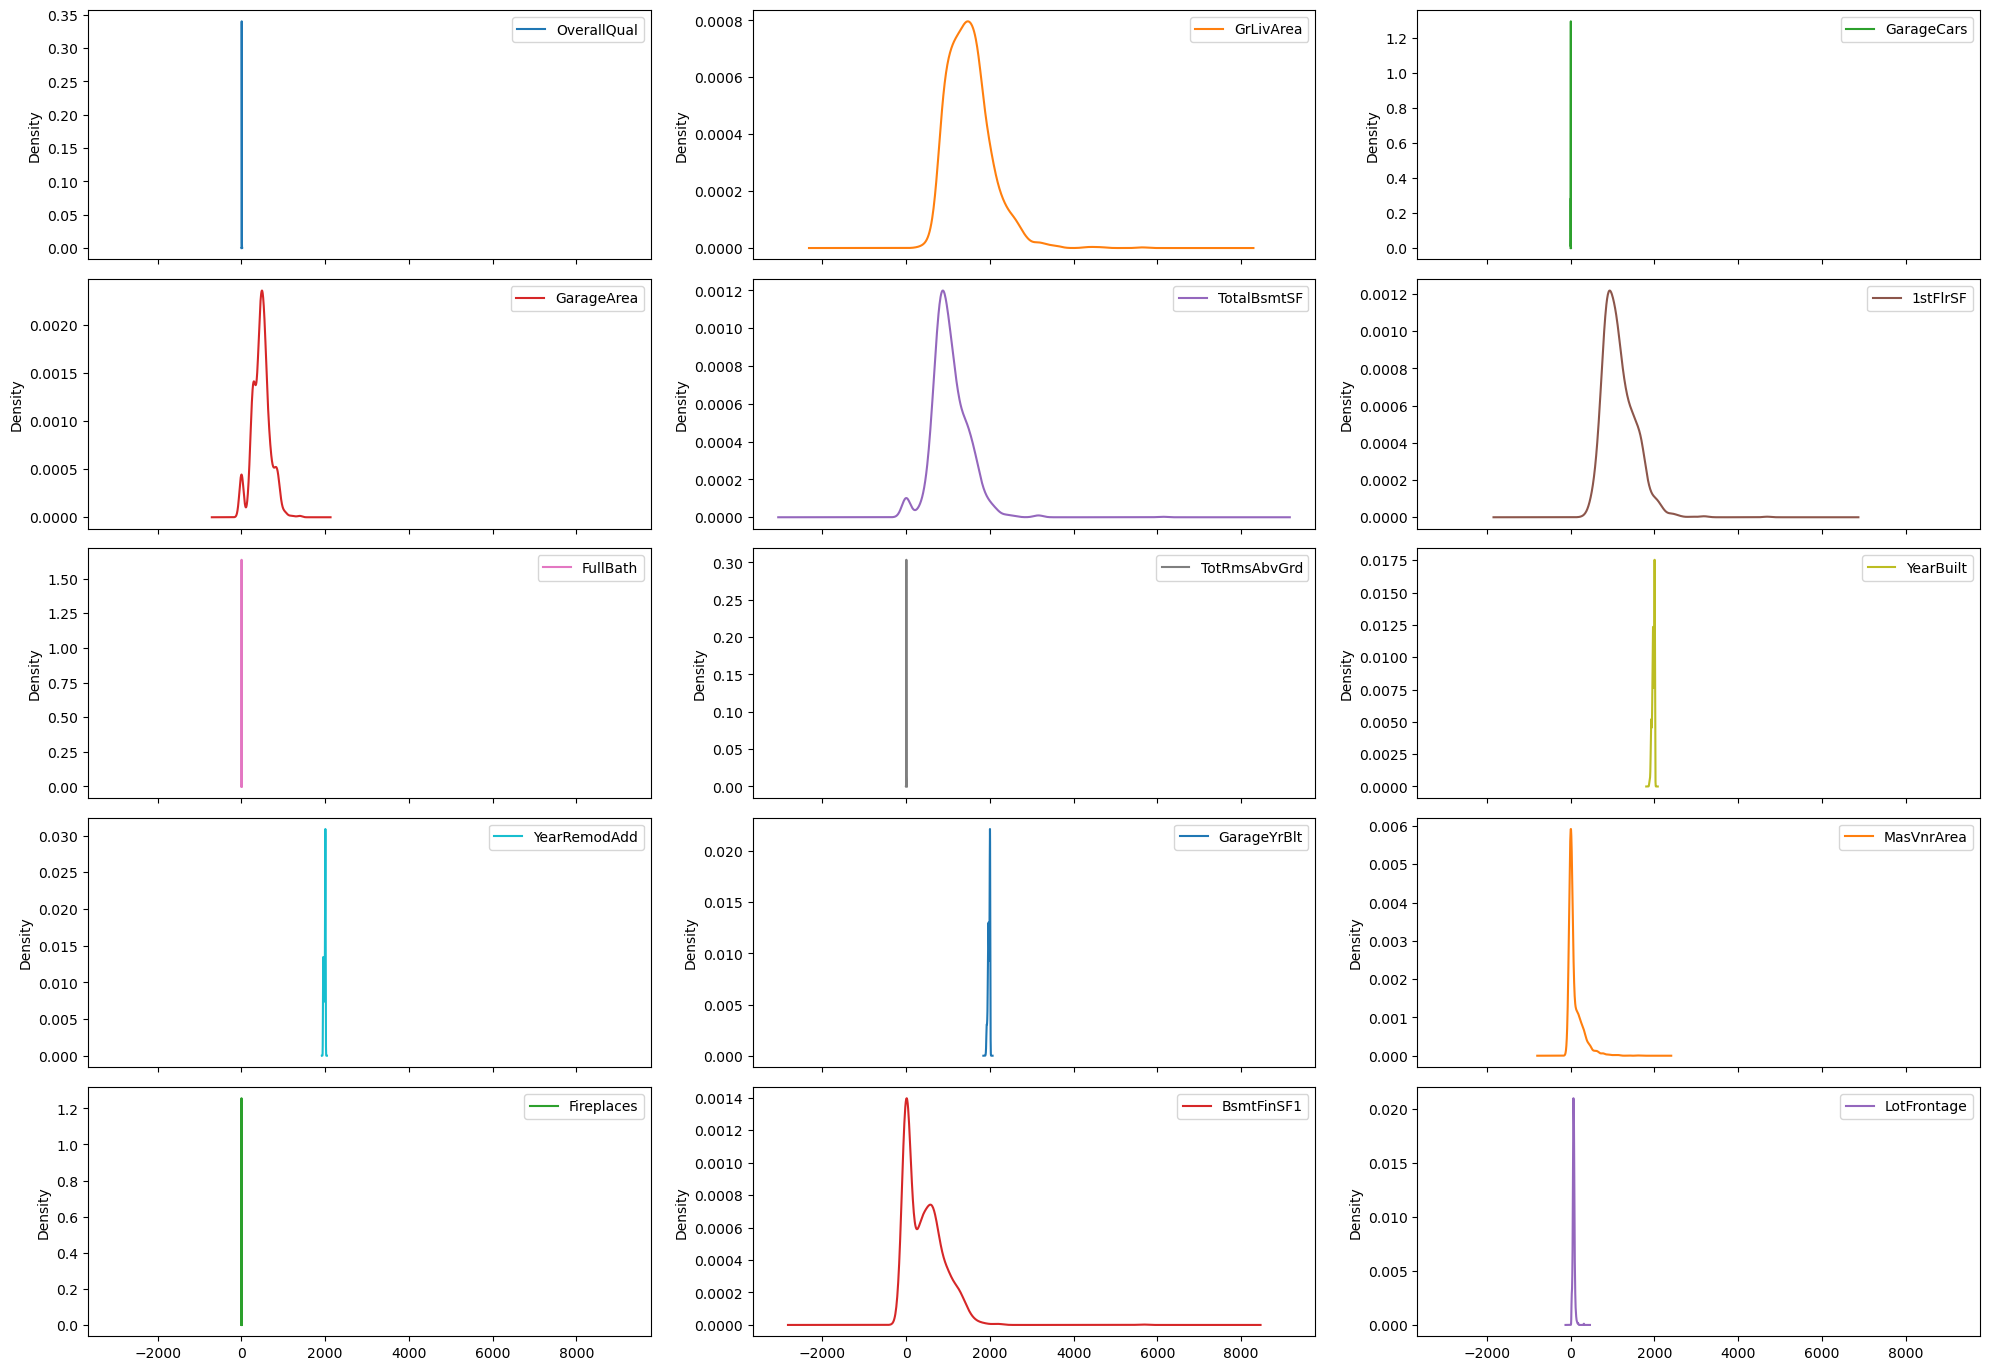

In [5]:
#Understanding the distribution of these columns
plt.figure(figsize=(20, 15))
df[features_15].plot(kind='kde', subplots=True, layout=(5, 3), figsize=(20, 15))
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

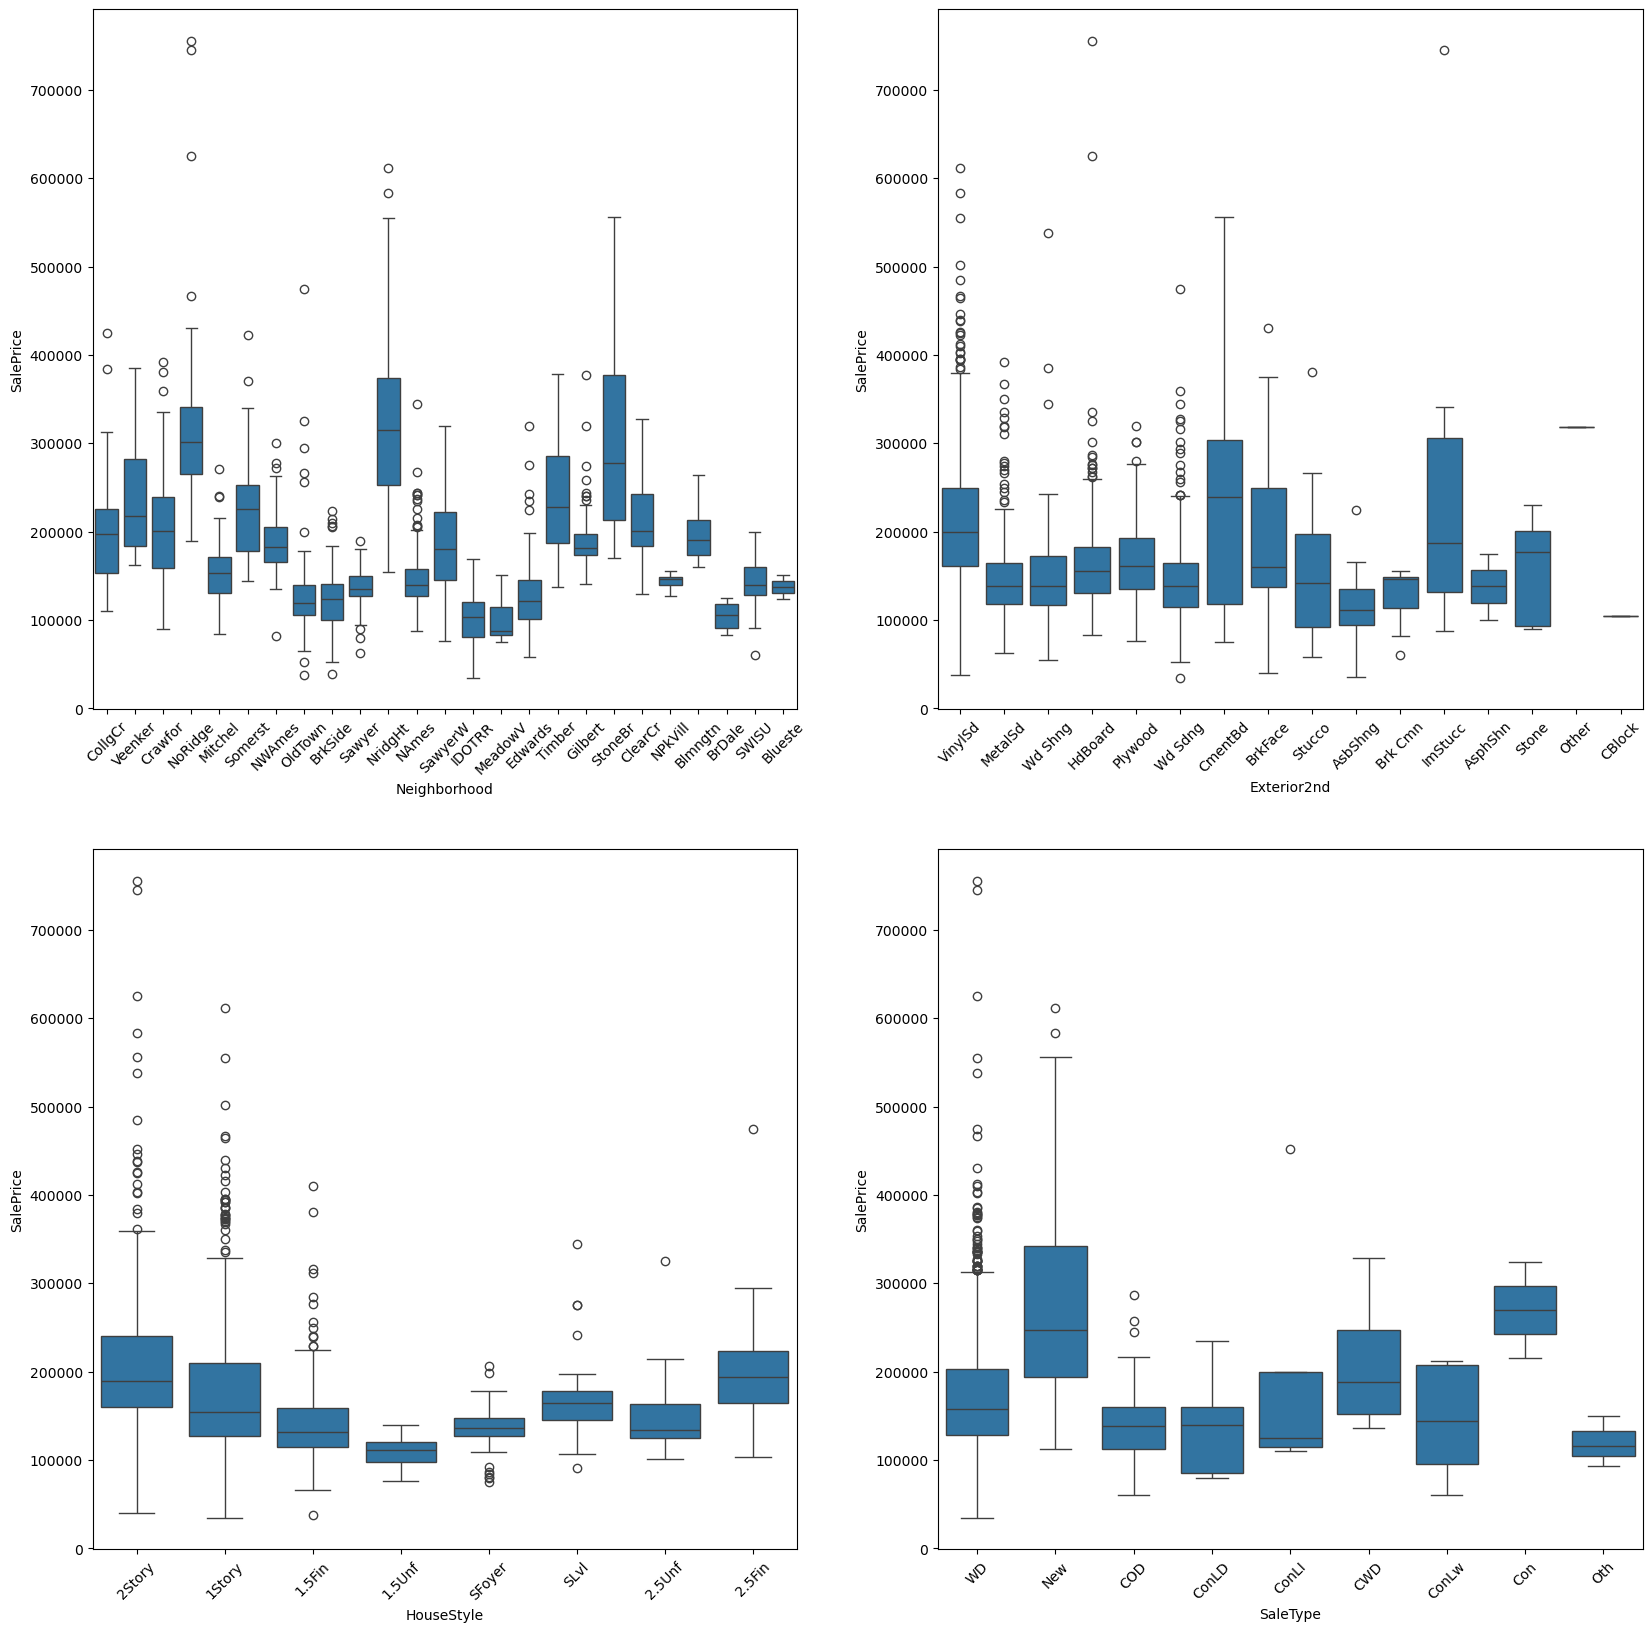

In [6]:
#Function to create box-plots
def create_box(x):
    sns.boxplot(x=x, y="SalePrice", data=df)
    plt.xticks(rotation=45)

#Plotting subplots of most important categorical features
df.select_dtypes(include='object').nunique().sort_values()
plt.figure(figsize=(20, 20))

#Box plot for neighborhood and sales-price
plt.subplot(2, 2, 1)
create_box("Neighborhood")

#Box plot for neighborhood and Exterior2nd
plt.subplot(2, 2, 2)
create_box("Exterior2nd")

#Box plot for neighborhood and Housestyle
plt.subplot(2,2, 3)
create_box("HouseStyle")

#Box plot for neighborhood and SaleType
plt.subplot(2, 2, 4)
create_box("SaleType")

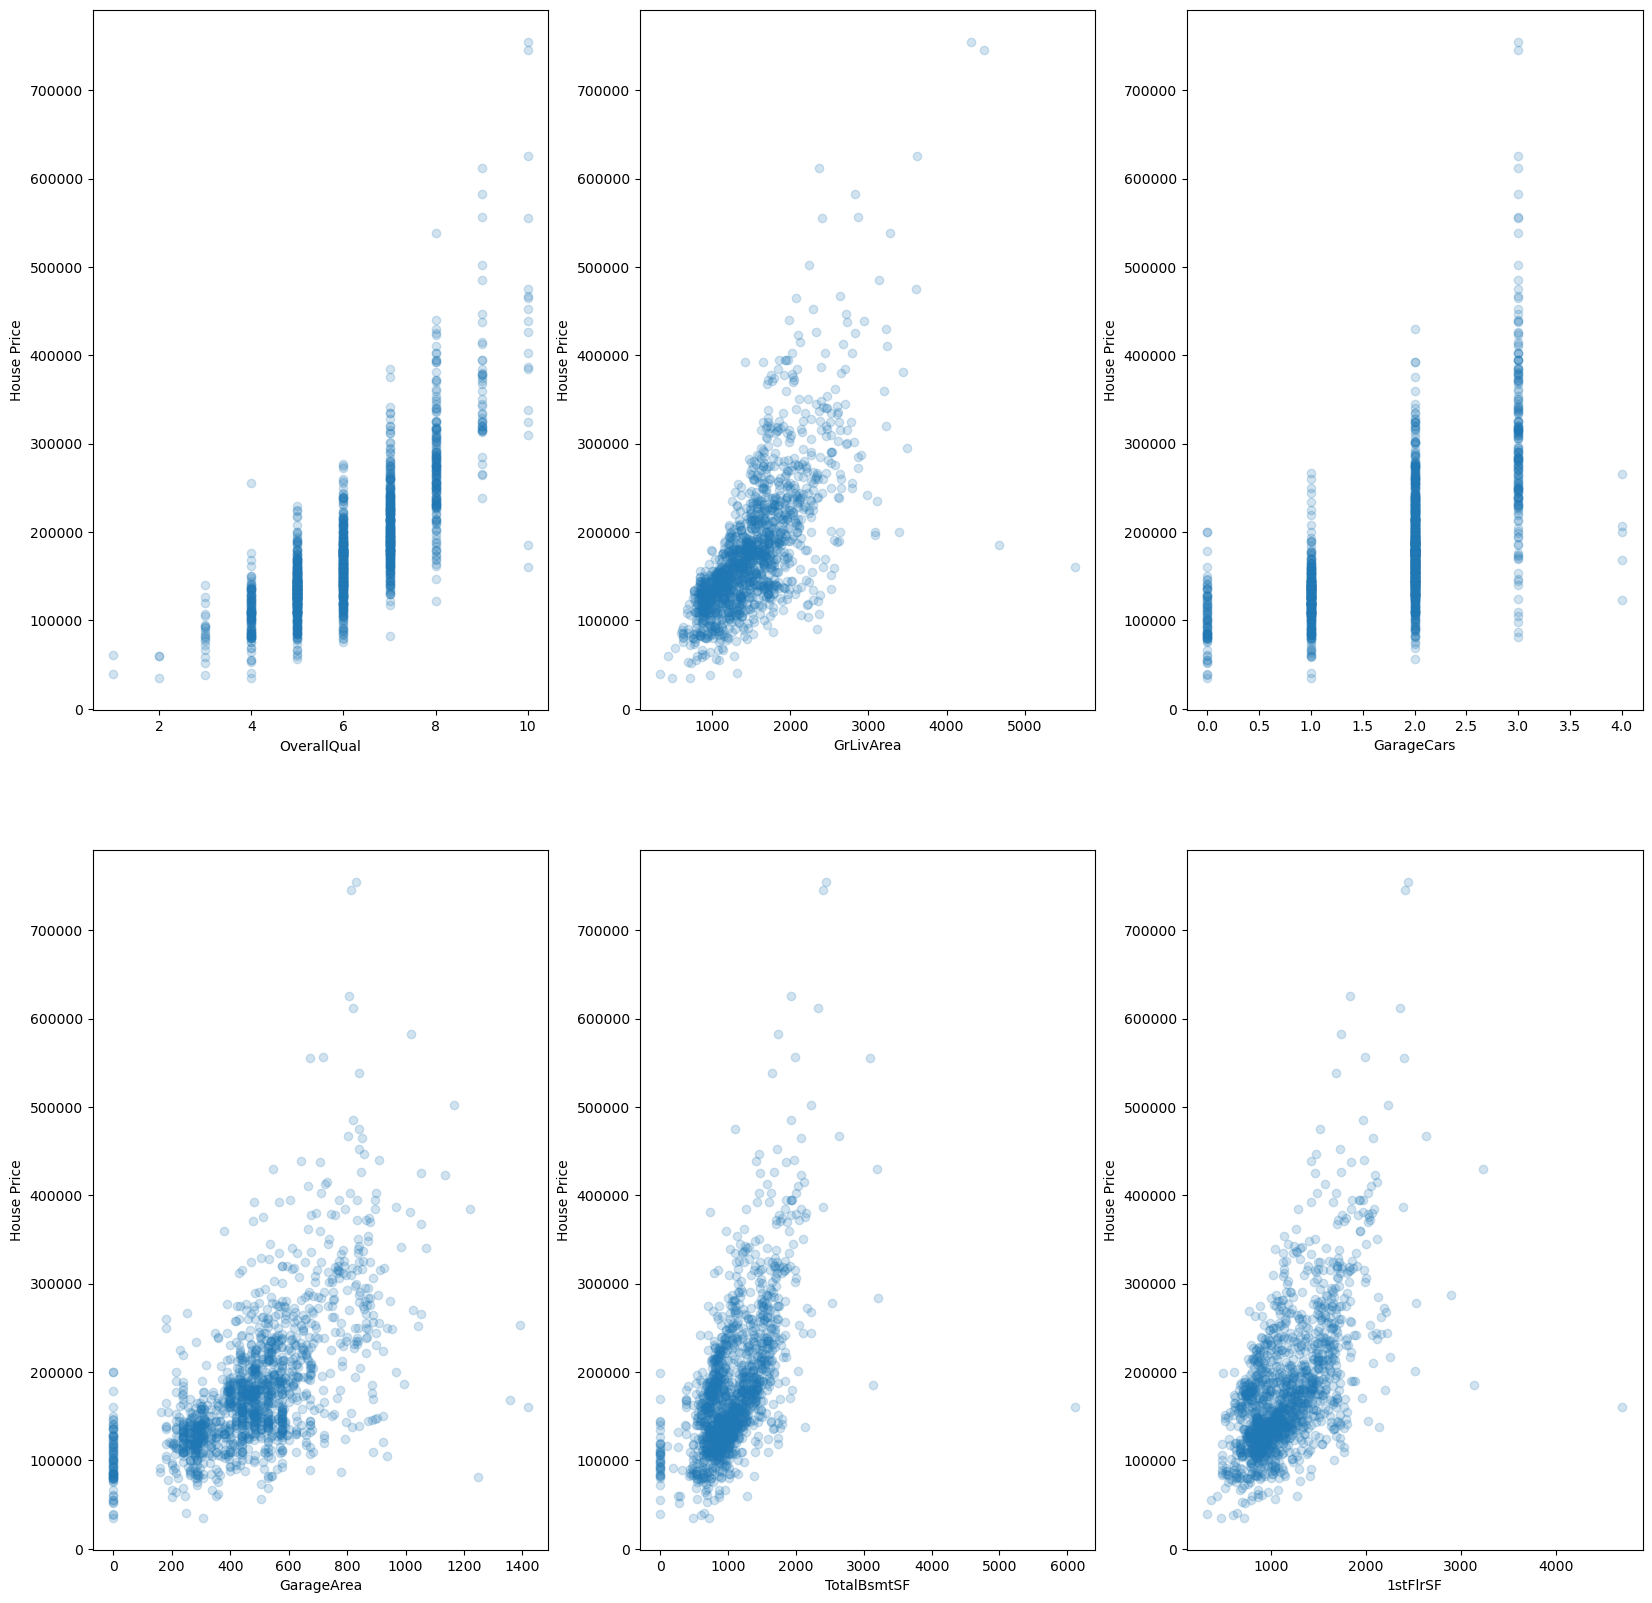

In [7]:
#Understanding skewness of the data 
df[features_15].skew()

#Plotting scatter matrix for top 5 columns to understand distribution of outliers
top_5 = features_15[:6]
plt.figure(figsize=(20, 20))
for i in range(6):
    plt.subplot(2, 3, (i+1))
    plt.scatter(x=top_5[i], y="SalePrice", data=df, alpha=0.2)
    plt.xlabel(top_5[i])
    plt.ylabel("House Price")

<Axes: ylabel='Density'>

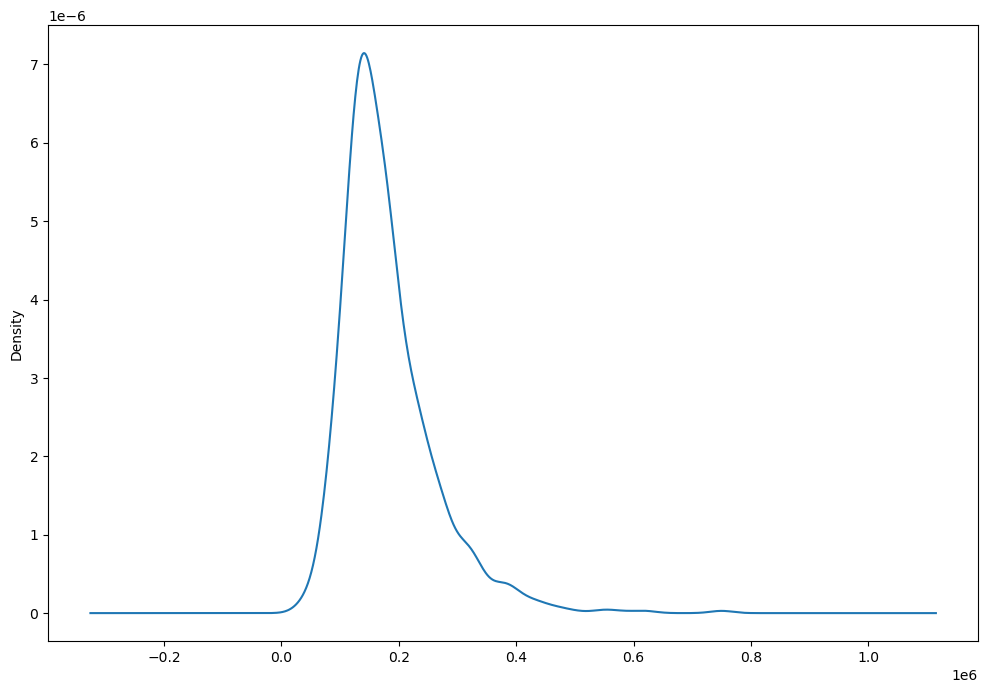

In [8]:
# Understanding the distribution of salesprice
df["SalePrice"].plot(kind = "kde", figsize=(12, 8) )

<Axes: xlabel='SalePrice', ylabel='Density'>

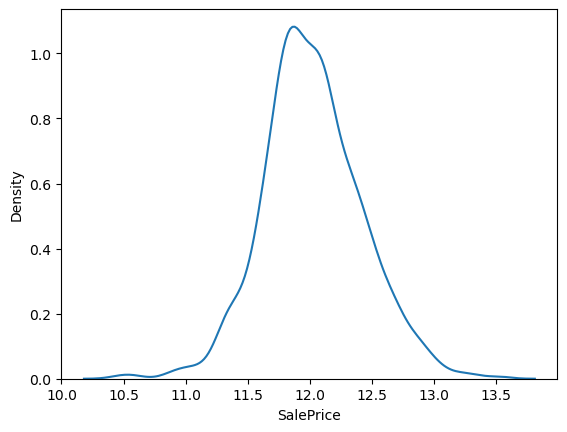

In [9]:
#Transforming the data to remove skewness
transformed = np.log1p(df["SalePrice"])
sns.kdeplot(transformed)